In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.NSGA2 import nsga2
import algorithms.NSGA2.evolutionary_operators as nsga2_operators

from algorithms.risk_measures import *

from data_loader import load_stock_quotations

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Reading data

In [2]:
stock_quotations = load_stock_quotations('data/NAZWY.txt')

delta_t = 90
stock_returns = stock_quotations.xs('close', level=1, axis=1).pct_change()
last_returns = stock_returns[-delta_t-1:-1]

stock_returns_mean = last_returns.mean() # predicted return for next day

# variance as risk
stock_returns_var = last_returns.var() # risk
stock_returns_cov = last_returns.cov() # covariance matrix

# semi-variance as risk
stock_returns_semi_var = semi_variance(last_returns)
stock_returns_semi_cov = semi_covariance_matrix(np.array(last_returns))

number_of_stocks = stock_returns.shape[1]

# Objective function

In [3]:
def portfolio_return_value(X):
    return X @ stock_returns_mean


def portfolio_risk_var(X):
    return np.diag(X @ stock_returns_cov @ X.T)


def portfolio_risk_semi_var(X):
    return np.diag(X @ stock_returns_semi_cov @ X.T)


def portfolio_objective_function(risk_function=portfolio_risk_var,
                                 return_function=portfolio_return_value):
    return lambda X: np.c_[risk_function(X), -return_function(X)]

# Tests

In [13]:
def show_results(stock_risk, objective_function, **nsga2_kwargs):
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.title(f"NSGA-II: iterations: {nsga2_kwargs['number_of_iterations']}, population size: {nsga2_kwargs['population_size']}\n")
    plt.scatter(stock_risk, stock_returns_mean, c='gray', s=1, label='Basic stocks')

    nsga2_result = nsga2(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **nsga2_kwargs)

    pareto_front_nsga2 = objective_function(nsga2_result)

    plt.scatter(pareto_front_nsga2[:,0], -pareto_front_nsga2[:,1], c='r', label='NSGA-II')

    plt.legend()
    plt.show()

NSGA-II: 100%|██████████| 400/400 [32:22<00:00,  4.86s/it]


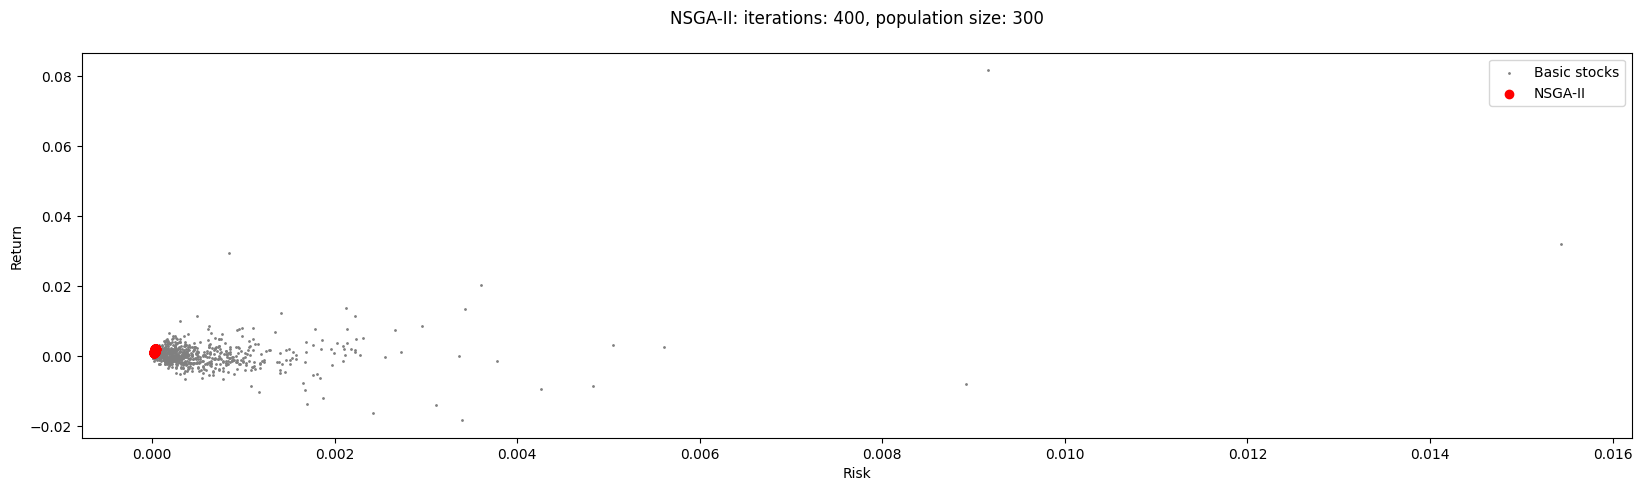

In [15]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=300,
             number_of_offspring=600,
             number_of_iterations=400)

##### Changing alpha parameter

NSGA-II: 100%|██████████| 400/400 [19:01<00:00,  2.85s/it]


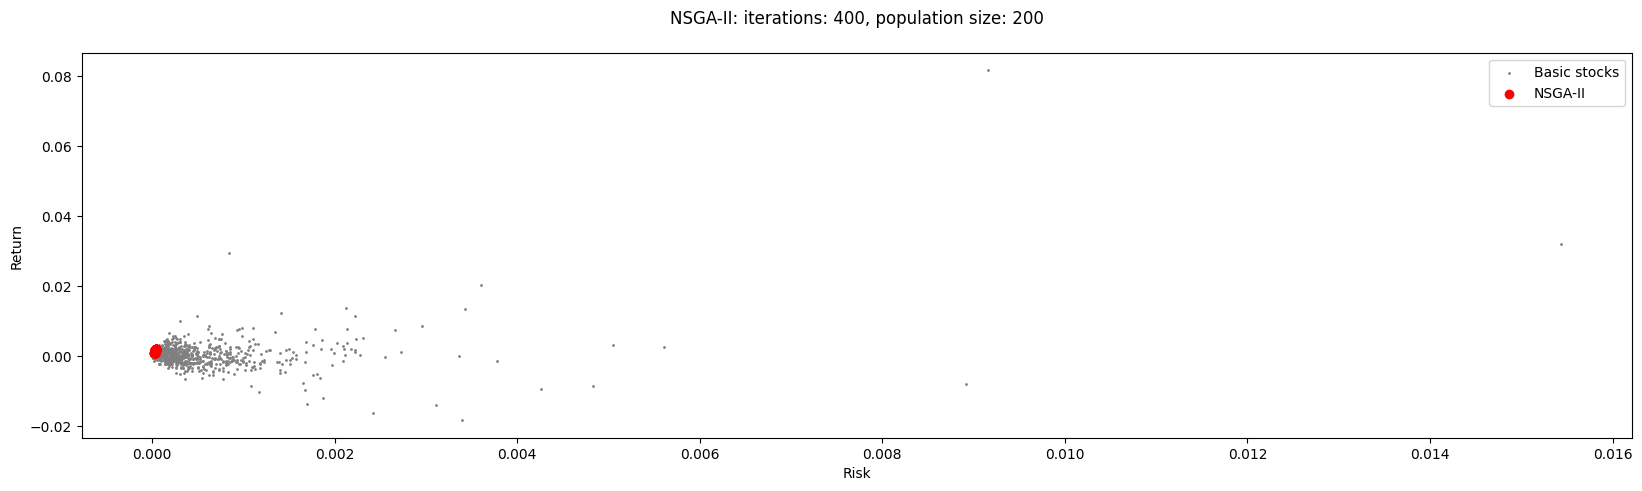

In [16]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             alpha=0.5)

##### Swap mutation

NSGA-II: 100%|██████████| 400/400 [16:48<00:00,  2.52s/it]


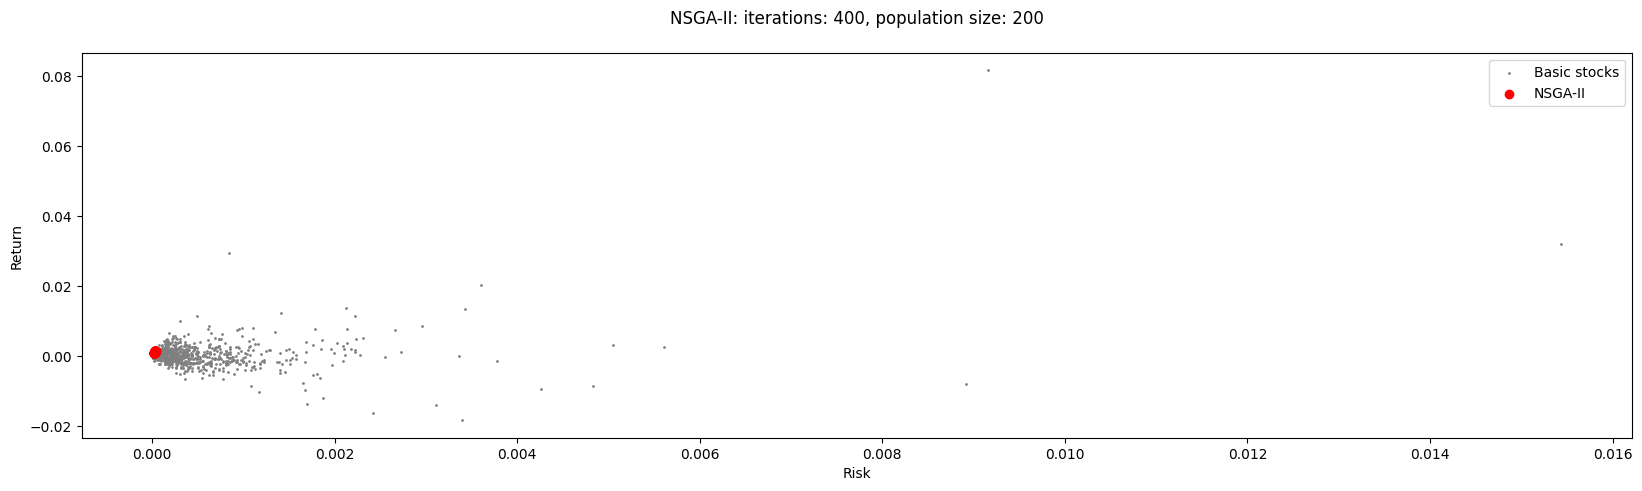

In [17]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)

##### Differential crossover

NSGA-II: 100%|██████████| 400/400 [10:19<00:00,  1.55s/it]


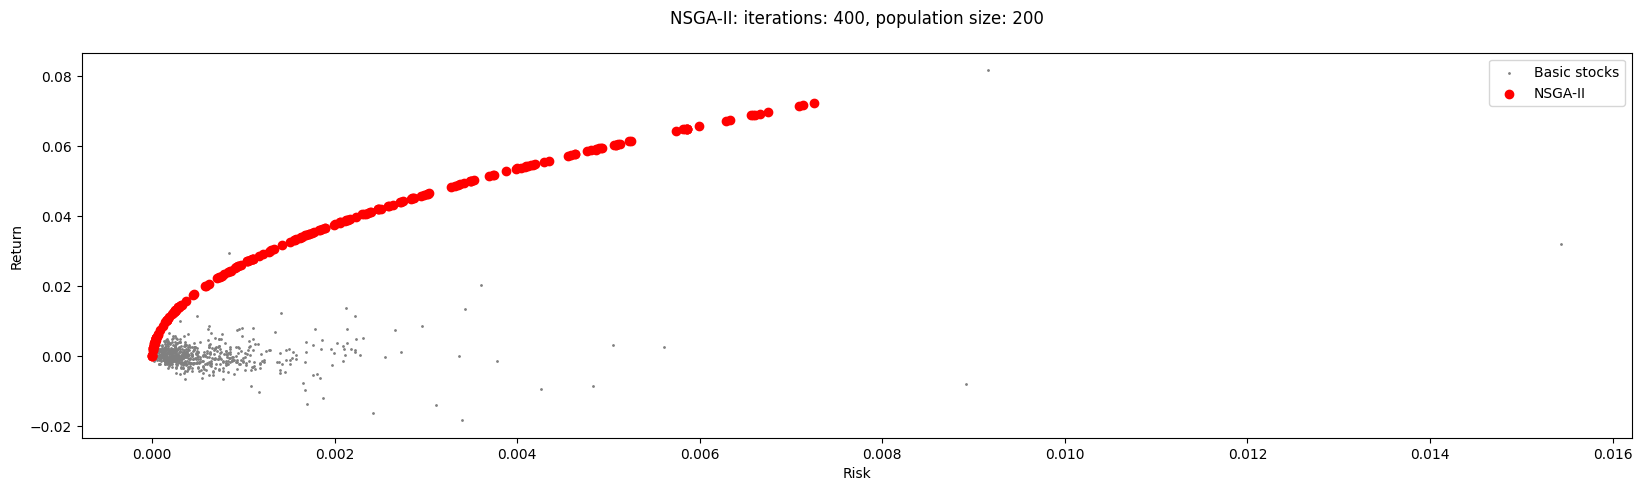

In [20]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(0.5),
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [13:26<00:00,  2.02s/it]


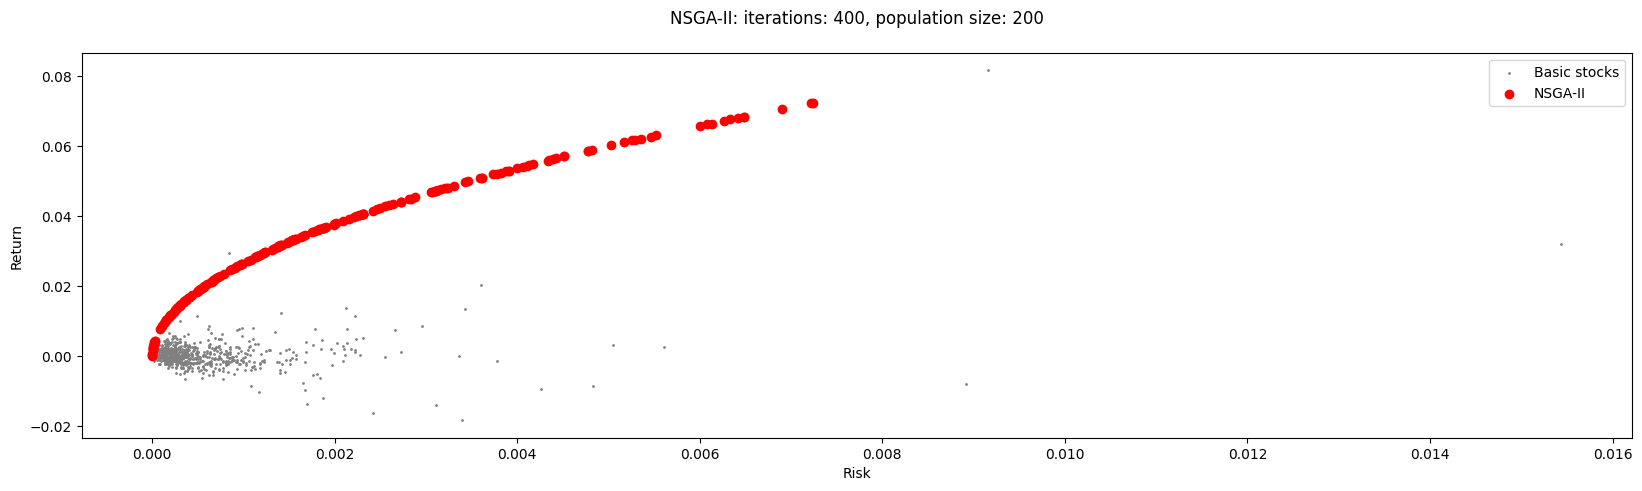

In [19]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(0.5),
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)